# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [10]:
import flatiron_stats as fs
from scipy import stats

In [8]:
ed_comp = df[['FormalEducation', 'AdjustedCompensation']]
bachelor = ed_comp[ed_comp.FormalEducation == "Bachelor's degree"]
bachelor = bachelor.dropna()
master = ed_comp[ed_comp.FormalEducation == "Master's degree"]
master = master.dropna()

In [11]:
ttest = stats.ttest_ind(master.AdjustedCompensation, bachelor.AdjustedCompensation, equal_var=False)
pvalue = ttest[1]/2
print("Sample size and Mean Salary with a Bachelor\'s degree: {}, {}".format(len(bachelor), np.mean(bachelor.AdjustedCompensation)))
print("Sample size and Mean Salary with a Master\'s degree: {}, {}".format(len(master), np.mean(master.AdjustedCompensation)))
print("One-tailed Welch\'s t-test p-value: ",pvalue)

Sample size and Mean Salary with a Bachelor's degree: 1107, 64887.097994618794
Sample size and Mean Salary with a Master's degree: 1990, 69139.8998712
One-tailed Welch's t-test p-value:  0.33077639451272445


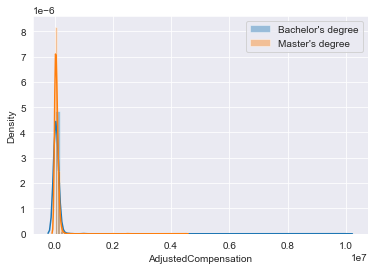

In [12]:
sns.distplot(bachelor.AdjustedCompensation, label="Bachelor\'s degree")
sns.distplot(master.AdjustedCompensation, label="Master\'s degree")
plt.legend()
plt.show()

In [13]:
# Heavy Outliers.  We will remove them and rerun the t-test
bachelor2 = bachelor[bachelor.AdjustedCompensation <= 300000]
master2 = master[master.AdjustedCompensation <= 300000]

ttest = stats.ttest_ind(master2.AdjustedCompensation, bachelor2.AdjustedCompensation, equal_var=False)
pvalue = ttest[1]/2
print("Sample size and Mean Salary with a Bachelor\'s degree: {}, {}".format(len(bachelor2), np.mean(bachelor2.AdjustedCompensation)))
print("Sample size and Mean Salary with a Master\'s degree: {}, {}".format(len(master2), np.mean(master2.AdjustedCompensation)))
print("One-tailed Welch\'s t-test p-value: ",pvalue)

Sample size and Mean Salary with a Bachelor's degree: 1097, 51968.51775755972
Sample size and Mean Salary with a Master's degree: 1980, 63123.543506913134
One-tailed Welch's t-test p-value:  3.1432543121005063e-09


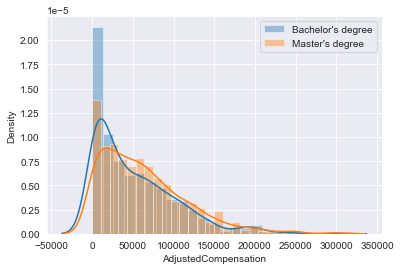

In [14]:
sns.distplot(bachelor2.AdjustedCompensation, label="Bachelor\'s degree")
sns.distplot(master2.AdjustedCompensation, label="Master\'s degree")
plt.legend()
plt.show()

Due to heavy outliers, the differences in salary were not significant

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [15]:
doctorate = ed_comp[ed_comp.FormalEducation == "Doctoral degree"]
doctorate = doctorate.dropna()

ttest = stats.ttest_ind(doctorate.AdjustedCompensation, bachelor.AdjustedCompensation, equal_var=False)
pvalue = ttest[1]/2
print("Sample size and Mean Salary with a Bachelor\'s degree: {}, {}".format(len(bachelor), np.mean(bachelor.AdjustedCompensation)))
print("Sample size and Mean Salary with a Doctorate degree: {}, {}".format(len(doctorate), np.mean(doctorate.AdjustedCompensation)))
print("One-tailed Welch\'s t-test p-value: ",pvalue)

Sample size and Mean Salary with a Bachelor's degree: 1107, 64887.097994618794
Sample size and Mean Salary with a Doctorate degree: 967, 29566175.762453098
One-tailed Welch's t-test p-value:  0.15682381994720257


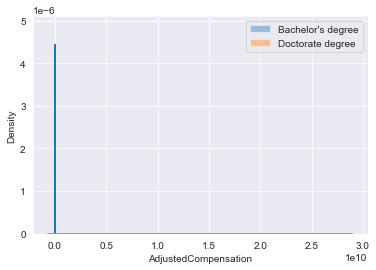

In [16]:
sns.distplot(bachelor.AdjustedCompensation, label="Bachelor\'s degree")
sns.distplot(doctorate.AdjustedCompensation, label="Doctorate degree")
plt.legend()
plt.show()

In [17]:
doctorate2 = doctorate[doctorate.AdjustedCompensation <= 300000]

ttest = stats.ttest_ind(doctorate2.AdjustedCompensation, bachelor2.AdjustedCompensation, equal_var=False)
pvalue = ttest[1]/2
print("Sample size and Mean Salary with a Bachelor\'s degree: {}, {}".format(len(bachelor2), np.mean(bachelor2.AdjustedCompensation)))
print("Sample size and Mean Salary with a Doctorate degree: {}, {}".format(len(doctorate2), np.mean(doctorate2.AdjustedCompensation)))
print("One-tailed Welch\'s t-test p-value: ",pvalue)

Sample size and Mean Salary with a Bachelor's degree: 1097, 51968.51775755972
Sample size and Mean Salary with a Doctorate degree: 954, 83440.21204626939
One-tailed Welch's t-test p-value:  1.4485158916572985e-36


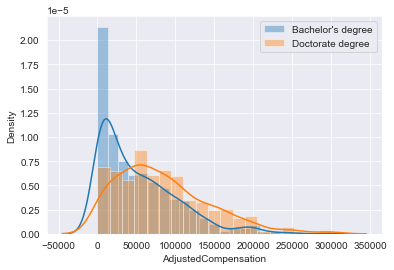

In [18]:
sns.distplot(bachelor2.AdjustedCompensation, label="Bachelor\'s degree")
sns.distplot(doctorate2.AdjustedCompensation, label="Doctorate degree")
plt.legend()
plt.show()

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
ed_comp = ed_comp.dropna()

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, ed_comp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [20]:
ed_comp = ed_comp[ed_comp.AdjustedCompensation <= 300000]

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, ed_comp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.306853e+11     6.0  30.558557  4.061426e-36
Residual            1.244287e+13  4299.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!